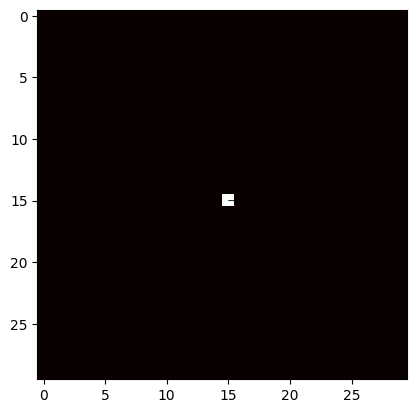

In [450]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as itr
from boundaries import WallBoundary, PressureBoundary

# Initializing a rank three tensor filled with nodes
latticeSize = 9
xResolution = 30
yResolution = 30
relaxationTime = 0.5
# Weights
unitVect = np.array([
	[0, 0],	[1, 0], [0, 1],
	[-1, 0], [0, -1], [1, 1],
	[-1, 1], [-1, -1], [1, -1]
])
unitX = np.array([
	0, 1, 0, -1, 0, 1, -1, -1, 1
])
unitY = np.array([
	0, 0, 1, 0, -1, 1, 1, -1, -1
])
weight = np.array([
    4/9, 1/9, 1/9,
    1/9, 1/9, 1/36,
    1/36, 1/36, 1/36
])
cs = np.sqrt(3)

# Initializing the fluid matrix
fluid = np.ones((xResolution, yResolution, latticeSize))# + 0.1 * np.random.randn(xResolution, yResolution, latticeSize)
fluid[15, 15, 1] = 2
iteratedFluid = fluid.copy()

density = np.sum(fluid, axis = 2)
momentumX = np.sum(fluid * unitX, axis = 2)
momentumY = np.sum(fluid * unitY, axis = 2)
speedX = momentumX / density
speedY = momentumY / density

X = np.arange(xResolution)
Y = np.arange(yResolution)

plt.quiver(X, Y, speedX, speedY)
plt.imshow(density, cmap='hot', interpolation='nearest')

In [422]:
def stepFluid(fluid):
    # Stabilizing Step
    density = np.sum(fluid, 2)
    speedX = np.sum(fluid * unitX, 2) / density
    speedY = np.sum(fluid * unitY, 2) / density
    
    fluidEquilibrium = np.zeros(fluid.shape)
    
    # Equilizing step
    fluidEquilibrium = np.zeros(fluid.shape)
    for latticeIndex, cx, cy, w in zip(range(latticeSize), unitX, unitY, weight):
        fluidEquilibrium[:, :, latticeIndex] = density * w * (1 + 3*(cx * speedX + cy * speedY) + 9*(cx * speedX + cy * speedY) ** 2 / 2 - 3*(speedX**2+speedY**2) / 2)
        
    fluid += - (1/relaxationTime) * (fluid - fluidEquilibrium)
    
    for i, cx, cy in zip(range(latticeSize), unitX, unitY):
        fluid[:, :, i] = np.roll(fluid[:, :, i], cx, axis = 1)
        fluid[:, :, i] = np.roll(fluid[:, :, i], cy, axis = 0)
 
    return fluid

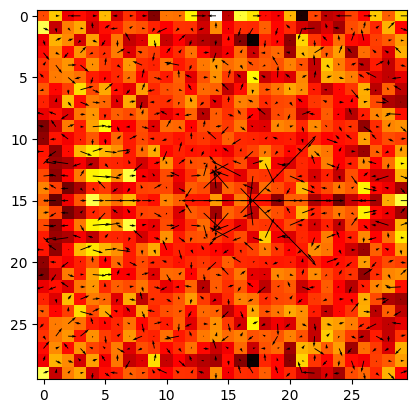

In [485]:
iteratedFluid = stepFluid(iteratedFluid)
iteratedDensity = np.sum(iteratedFluid, axis = 2)
iteratedMomentumX = np.sum(iteratedFluid * unitX, axis = 2)
iteratedMomentumY = np.sum(iteratedFluid * unitY, axis = 2) 
plt.imshow(iteratedDensity, cmap = "hot", interpolation = "nearest")
plt.quiver(X, Y, iteratedMomentumX, iteratedMomentumY)

/tmp/ipykernel_58114/721940801.py:6: RuntimeWarning: invalid value encountered in multiply
  mesoMomentum = fluid.reshape(xResolution, yResolution, latticeSize, 1) * unitVect
/tmp/ipykernel_58114/721940801.py:20: RuntimeWarning: overflow encountered in scalar power
  1 + momentumDot / (cs ** 2) + momentumDot ** 2 / (cs ** 4) - cellMomentumMagnitude
/tmp/ipykernel_58114/721940801.py:20: RuntimeWarning: invalid value encountered in scalar add
  1 + momentumDot / (cs ** 2) + momentumDot ** 2 / (cs ** 4) - cellMomentumMagnitude
/tmp/ipykernel_58114/721940801.py:19: RuntimeWarning: invalid value encountered in scalar multiply
  fluidEquilibrium = latticeDensity * weight[latticeIndex] * (
/tmp/ipykernel_58114/721940801.py:19: RuntimeWarning: overflow encountered in scalar multiply
  fluidEquilibrium = latticeDensity * weight[latticeIndex] * (
/tmp/ipykernel_58114/721940801.py:22: RuntimeWarning: invalid value encountered in scalar add
  iteratedFluid[xIndex, yIndex, latticeIndex] = fluid[xIn

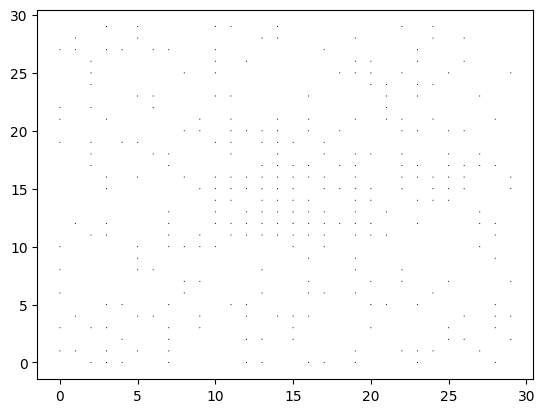

In [179]:
iteratedFluid, momentumOut = step(iteratedFluid)
X = np.arange(xResolution)
Y = np.arange(yResolution)
#print(list(momentumOut))
plt.quiver(X, Y, momentumOut[:,:,0], momentumOut[:,:,1])